**AUTOMATED ESSAY SCORING: CS109A FINAL PROJECT**

By Anmol Gupta, Annie Hwang, Paul Lisker, and Kevin Loughlin

**THINGS TO CONSIDER**

- See README.md for basic guides to what's in the repository
- The training essays are scored on different scales.  Take special care that we use the right score for each set.
- We should establish how to handle anonymized data (like how they replaced business names with @ORGANIZATION1)

In [1]:
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

# stopwords for English
import nltk
from nltk.corpus import stopwords

# English 'dictionary'
from nltk.corpus import words

# Regular expressions might be useful
import re

# Beautiful soup might be useful
from bs4 import BeautifulSoup

from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline

In [2]:
# Read in training data
train_df = pd.read_csv('data/training_set_rel3.tsv', delimiter='\t')
print train_df.head()

print '\n*****\n'

# Show np extraction
train_essays_np = train_df['essay'].values
print train_essays_np.shape

   essay_id  essay_set                                              essay  \
0         1          1  Dear local newspaper, I think effects computer...   
1         2          1  Dear @CAPS1 @CAPS2, I believe that using compu...   
2         3          1  Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...   
3         4          1  Dear Local Newspaper, @CAPS1 I have found that...   
4         5          1  Dear @LOCATION1, I know having computers has a...   

   rater1_domain1  rater2_domain1  rater3_domain1  domain1_score  \
0               4               4             NaN              8   
1               5               4             NaN              9   
2               4               3             NaN              7   
3               5               5             NaN             10   
4               4               4             NaN              8   

   rater1_domain2  rater2_domain2  domain2_score      ...        \
0             NaN             NaN            NaN      ...    

In [3]:
# Read in testing data
test_df = pd.read_csv('data/test_set.tsv', delimiter='\t')
#print test_df.head()

print '\n*****\n'

# Show np extraction
test_essays_np = test_df['essay'].values
print test_essays_np.shape


*****

(4254,)


In [4]:
# Read in validation data
valid_df = pd.read_csv('data/valid_set.tsv', delimiter='\t')
#print valid_df.head()

print '\n*****\n'

# Show np extraction
valid_essays_np = valid_df['essay'].values
print valid_essays_np.shape


*****

(4218,)


In [5]:
# Make english words and stoplist a set for efficiency
nltk_words_set = set(words.words())
stop_words = set(stopwords.words("english"))

# only alphabet characters in text
def alpha_only(text):
    return re.sub("[^a-zA-Z]", " ", text)

# split text into word iterable
def split_by_words(text):
    return alpha_only(text).split()

# Extracts words from text, alpha characters only and all lowercase
# Inspired by function included in Kevin's CS51 final project, adapted from Kaggle's Popcorn Movie Reviews Project
# Used in Kevin's assignment 5
def clean_essay(text):
    # Converts all letters to lower case and splits string into words
    words = alpha_only(text).lower().split()
    
    # TODO If we want to remove stop words, we can before the below
    #words = [w for w in words if not w in stop_words]

    # TODO If we want to check what is actually a word, we can do the below
    # words = [w for w in words if w in nltk_words_set]

    # Return words as string separated by space
    return (" ".join( words ))

# Gets word count
def get_word_count(text):
    return len(split_by_words(text))

In [7]:
print "Cleaning training essays..."

cleaned = []
for essay in train_essays_np:
    cleaned.append(clean_essay(essay))
train_clean = np.array(cleaned)

print "Cleaning testing essays..."

cleaned = []
for essay in test_essays_np:
    cleaned.append(clean_essay(essay))
test_clean = np.array(cleaned)

print "Cleaning validation essays..."

cleaned = []
for essay in valid_essays_np:
    cleaned.append(clean_essay(essay))
valid_clean = np.array(cleaned)

print "Done."

print train_clean.shape

Cleaning training essays...
Cleaning testing essays...
Cleaning validation essays...
Done.
(12976,)
[ 'dear local newspaper i think effects computers have on people are great learning skills affects because they give us time to chat with friends new people helps us learn about the globe astronomy and keeps us out of troble thing about dont you think so how would you feel if your teenager is always on the phone with friends do you ever time to chat with your friends or buisness partner about things well now there s a new way to chat the computer theirs plenty of sites on the internet to do so organization organization caps facebook myspace ect just think now while your setting up meeting with your boss on the computer your teenager is having fun on the phone not rushing to get off cause you want to use it how did you learn about other countrys states outside of yours well i have by computer internet it s a new way to learn about what going on in our time you might think your child spend

In [10]:
# If we want to limit to the most common words in our vectorizer, set this number
# Doing so will speed things up (and potentially increase accuracy)
# None indicates no limit
max_words = None

# turns words into word vector, but note that removes stop words
vectorizer = CountVectorizer(stop_words='english', max_features=max_words)

# fit vectorizer on training data
train_vec = vectorizer.fit_transform(train_clean).toarray()

# apply vectorizer to testing and validation sets
test_vec = vectorizer.transform(test_clean).toarray()
valid_vec = vectorizer.transform(valid_clean).toarray()

print train_vec.shape
print test_vec.shape
print valid_vec.shape

(12976, 37678)
(4254, 37678)
(4218, 37678)


Calculating word counts...
Plotting data...


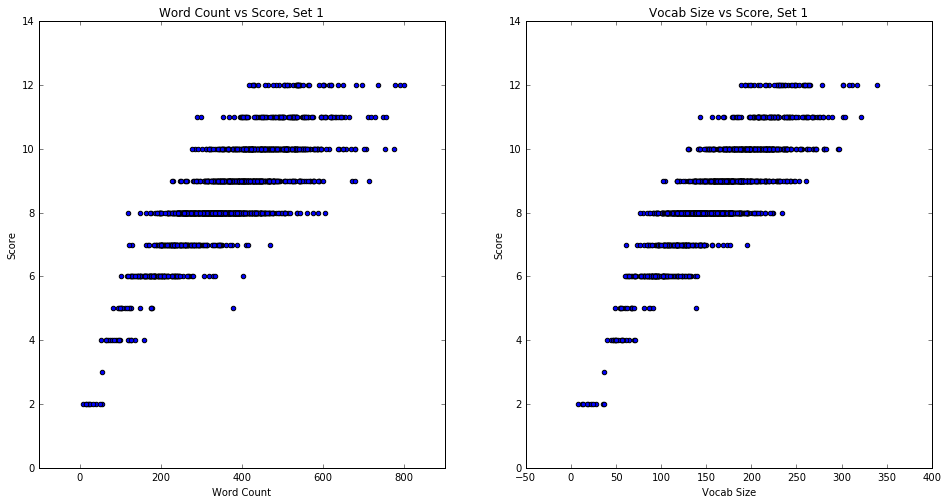

In [12]:
# This is where the graphing actually occurs

# Make a list of training essays by set
train_by_set = []
for i in xrange(8):
    train_by_set.append(train_df[train_df['essay_set'] == i + 1])

# I graph for set 1 (index 0)
texts = train_by_set[0]['essay'].values

# be aware that different essay sets have different scoring systems
# be sure to choose correct column
for train in train_by_set:
scores = list(train_by_set[0]['domain1_score'].values)

word_counts = []
vocabs = []

vectorizer = CountVectorizer()

print "Calculating word counts..."

# calc vocab size and word counts
for essay in texts:
    vocabs.append(vectorizer.fit_transform(split_by_words(essay)).toarray().shape[1])
    word_counts.append(get_word_count(essay))
    
    
_, ax = plt.subplots(1, 2, figsize=(16, 8))

# plot essay set number 1 word count versus score
ax[0].set_title('Word Count vs Score, Set 1')
ax[0].set_xlabel('Word Count')
ax[0].set_ylabel('Score')
ax[0].scatter(word_counts, scores)

# plot essay set number 1 vocab size versus score
ax[1].set_title('Vocab Size vs Score, Set 1')
ax[1].set_xlabel('Vocab Size')
ax[1].set_ylabel('Score')
ax[1].scatter(vocabs, scores)

print "Plotting data..."

plt.show()

# Plotting the same graphs for all 8 datasets

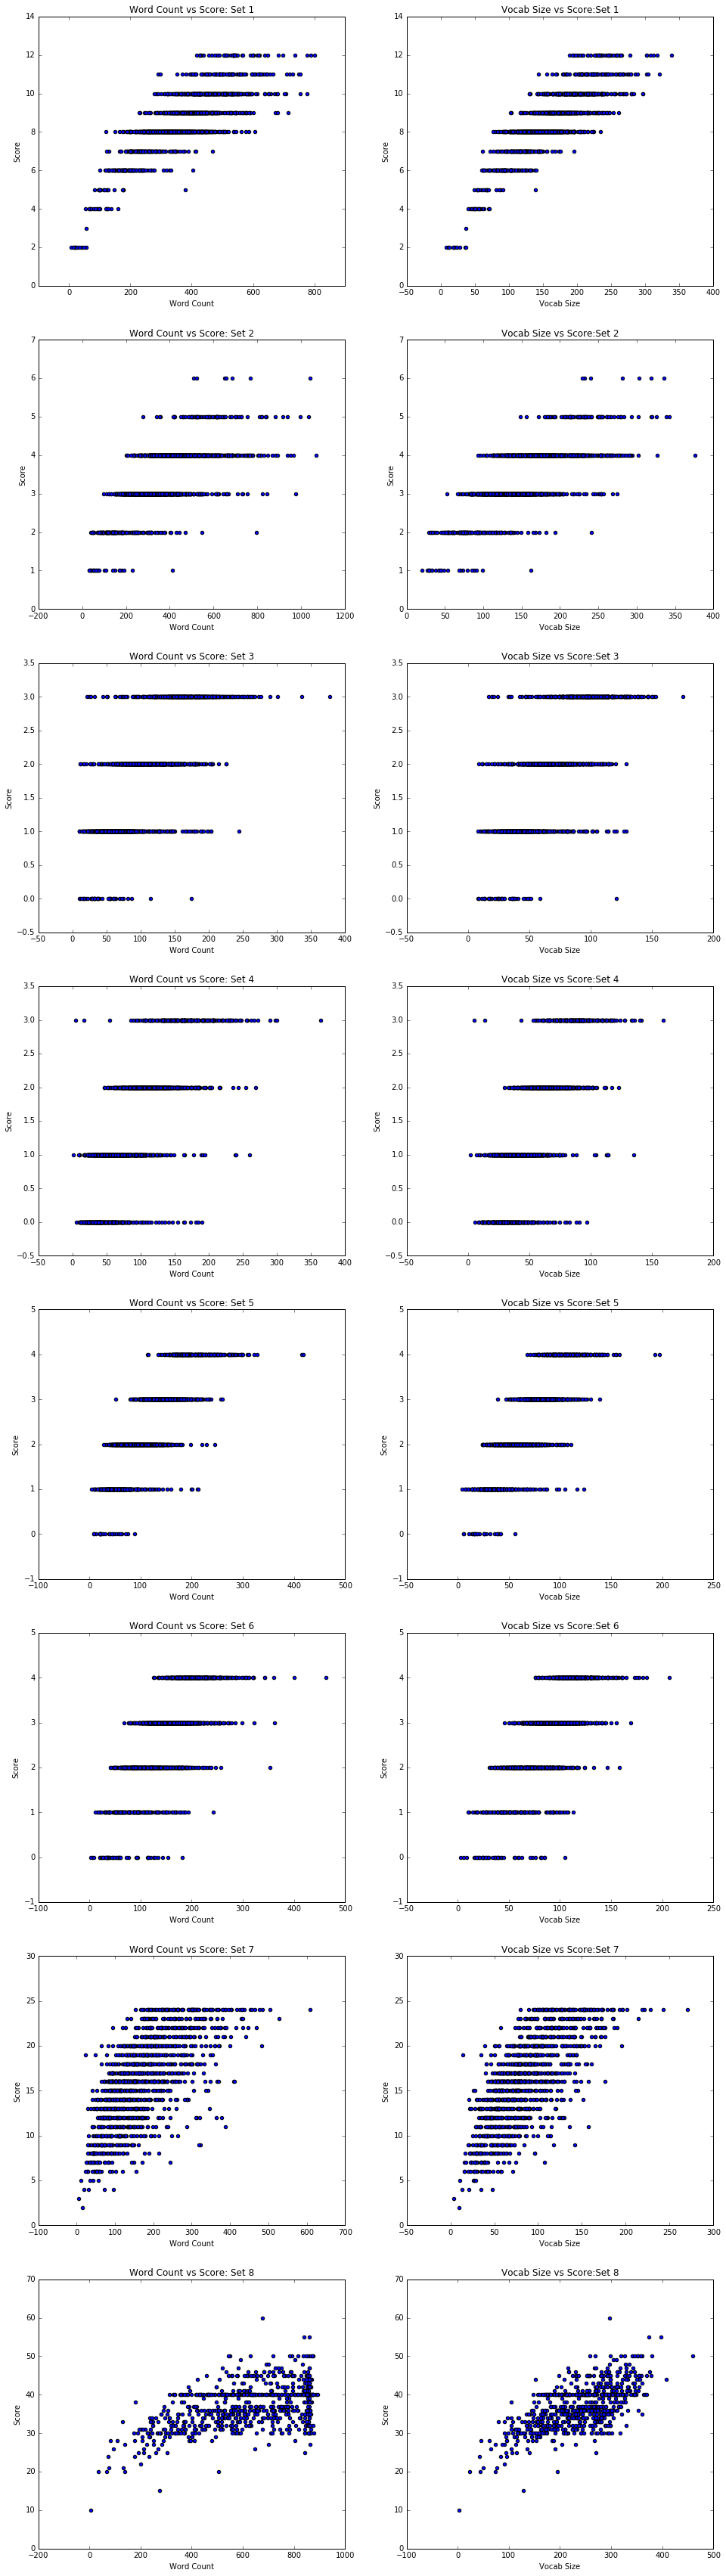

In [46]:
vectorizer = CountVectorizer()

_, ax = plt.subplots(8, 2, figsize=(16, 60))

# for dataset 1 - 4, we can use domain1_score

def plot_visuals(data, title, ax1, ax2):
    word_counts = []
    vocabs = []
    #scores = list(data[column_name].values)
    scores = list(data['domain1_score'].values)
    
    texts = data['essay'].values
    for essay in texts:
        vocabs.append(vectorizer.fit_transform(split_by_words(essay)).toarray().shape[1])
        word_counts.append(get_word_count(essay))
    
    # plot essay set number 1 word count versus score
    ax1.set_title('Word Count vs Score: ' + title)
    ax1.set_xlabel('Word Count')
    ax1.set_ylabel('Score')
    ax1.scatter(word_counts, scores)

    # plot essay set number 1 vocab size versus score
    ax2.set_title('Vocab Size vs Score:' + title)
    ax2.set_xlabel('Vocab Size')
    ax2.set_ylabel('Score')
    ax2.scatter(vocabs, scores)
    
for idx, train in enumerate(train_by_set):
    title = 'Set ' + str(idx + 1)
    plot_visuals(train, title, ax[idx][0], ax[idx][1])              

plt.show()

The first step when trying to create a predictive model is always examining, analyzing, and visualizing each element of the dataset that you are working with. In our case, we are trying to create a model that best automatically grades essays based on important essay-writing components, which we will discuss later. We will be looking at 8 different datasets (taken from Kaggle) that all contain essays with given scores, which we are going to parse through and visualize based on a series of scatter plots. 

Because ultimately, we want to figure out a score for the essays, all of the factors that we are examining are plotted against the scores for the essays. For this part, we plotted the word counts against the scores and the vocabulary sizes against the scores for each of the datasets to if there was a pattern between the quantities. In order to calculate the word count for each essay, we used the python split function to split the text into words based on alpha characters. We then counted the length of that. For the vocabulary sizes, we used a count vectorizer that contained an index for each unique word, and counted the length of that.

Typically, one might assume that longer essays equate to higher essays scores because writing more means more effort, more ideas, and possibly a deeper dive into the subject matter. However, teachers do stress the importance of being succinct, and refraining from adding “fluff” and unnecessary details to papers. As a result, from personal experiences we predicted that longer essays would correlate to better scores, but we didn’t know if that was the case after seeing both sides of the argument.

Our logic behind vocabulary sizes affecting the essay score is that individuals who typically read and write more use a wide-variety of words. They have more exposure and understanding of how words are used, and in what context they make sense. An essay that frequently uses exciting, new words keeps the reader engaged, while also giving the writer the opportunity to best express his/her ideas from using words that fit best. Therefore, we would assume that a larger vocabulary list would signify a higher essay score.

Examining the scatterplots, the first thing that sticks out is that the word counts vs. score scatterplots for each of the sets were virtually the same as the vocabulary size vs. score scatterplots for each of the sets. That shows that there might be a relationship between the length of the essay and the different number of words that the writer uses. To rationalize this, one might think that someone who reads and writes more is keener on his/her ideas. That may cause them to write more detailed essays. This also might mean they enjoy writing more than someone who does not read or write as much. As a result, for later explanations of the graph, it would make sense to talk about the trends of both graphs for each set as one, since they are very similar.

From the word counts vs. score scatterplots, we see that in general, there seems to be an upward, positive trend between the essay words counts and the score. For sets 1, 2, 4, 5, 6, and 7, the groups of essays for each score shift over to the right for the most part. In set 4, we see how there are a couple of essays with the score of 1 that have a smaller word count and vocabulary list than the essays with a score of 0, but that is probably because essays with a score of 0 are either incomplete or are not about the topic. As a result, that is an outlier in this case, and does not speak to the general, positive relationship.

For set 3, we see that the essays for each score do not shift over to the right, but instead the groups of essays extend further to the right as the scores increase.  That shows that there are many essays, which have the same word and vocabulary length, but have different scores. However, the essays that do tend to have a distinctly greater word count and vocabulary size do tend to receive higher scores. Similarly, for sets 1, 2, 4, 5, 6, and 7, we see that the shifts are very slight as the scores increase, and that there still is a large overlap between the counts and scores, as they increase. This points to the same conclusion that word length might not correlate greatly to score because there are many essays with the same counts that earn different scores, but the essays that do have noticeably larger counts, do warrant higher scores.

Finally in set 8, we see an opposite trend in that essays with large word counts and vocabulary sizes range greatly in their scores. However, it is obvious that the essays that have low counts have very low scores. So unlike the other datasets, where noticeably higher counts equate to higher scores and the rest of the essays seem to be unaffected by the counts, we see that here, noticeably lower counts equate to lower scores and the rest of the essays seem to unaffected by the counts. This may be because this set of essays had a maximum word length, while the others didn’t.

In the future, we are going to examine more than just word counts and vocabulary size to determine essay grades. Some of the other factors we will be observing include number of sentences, number of paragraphs, paragraph lengths, number of grammatical errors, and number of punctuations used. Many of these numbers relate to the depth of the writing, and the number of ideas presented. With this information, hopefully, we will be able to find trends in the sets that we have, and see which predictors are the most significant when determining the score. 